# **Problem Statement**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. There are demographic, behavioral and medical risk factors.

In [1]:
# Importing Basic Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
print(f'The dataset has {df.shape[0]} rows')
print('&')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 3390 rows
&
The dataset has 17 columns


In [6]:
# Checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
#Describing the dataset
df.describe() 

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [101]:
#Checking for the null values..!
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [90]:
# Checking whether the peopple with null values of 'cigsPerDay' column smoking or not

df[df['cigsPerDay'].isnull()]['is_smoking']=='YES'

422     True
466     True
469     True
491     True
538     True
767     True
1461    True
1467    True
1597    True
1986    True
2031    True
2087    True
2240    True
2284    True
2527    True
2638    True
2648    True
2723    True
2879    True
2945    True
3301    True
3378    True
Name: is_smoking, dtype: bool

When we compare the 'CigsPerDay' column having null values with 'Is_Smoking' column, we fill the Yes columns with the Mean value & the No column with 0..!! 

In [102]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

The mean and the median values of the rest columns is almost the same so imputing the null values of the these columns with the median 

In [103]:
# Imputing the null values of all the other columns with the median of the column
df['education'] = df['education'].fillna(df['education'].median())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [104]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [105]:
# Changing the datatype of the columns from float to int 

df['education'] = df['education'].astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)

**Continuous Variables:**

* age
* cigsPerDay
* totChol
* sysBP
* diaBP
* BMI
* heartRate
* glucose

**Categorical Vaiables:**
* sex
* education
* is_smoking
* BPMeds
* prevalentStroke
* prevalentHyp
* diabetes
* TenYearCHD (Target Variable)





# **Exploratory Data Analysis**

In [16]:
# Creating 2 lists of continuous and categorical variables

continuous_var = ['age' , 'cigsPerDay', 'totChol', 'sysBP','diaBP','BMI','heartRate','glucose'] 
categorical_var =  ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

**Univariate Analysis -> :**

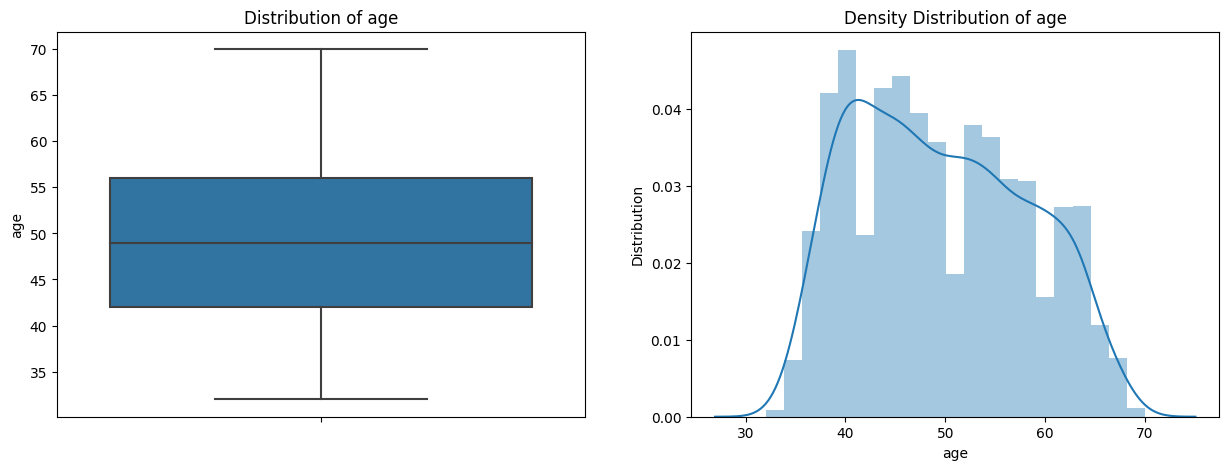

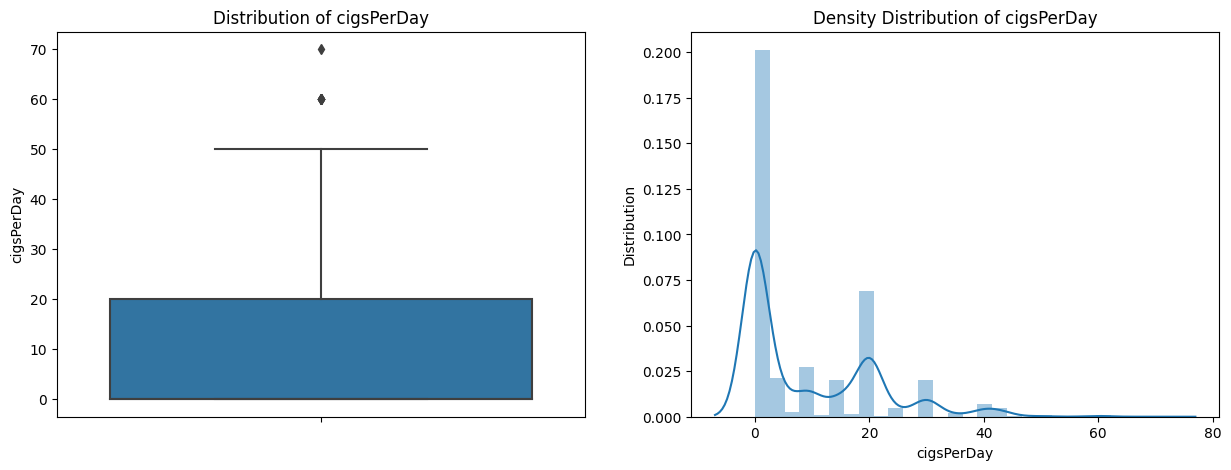

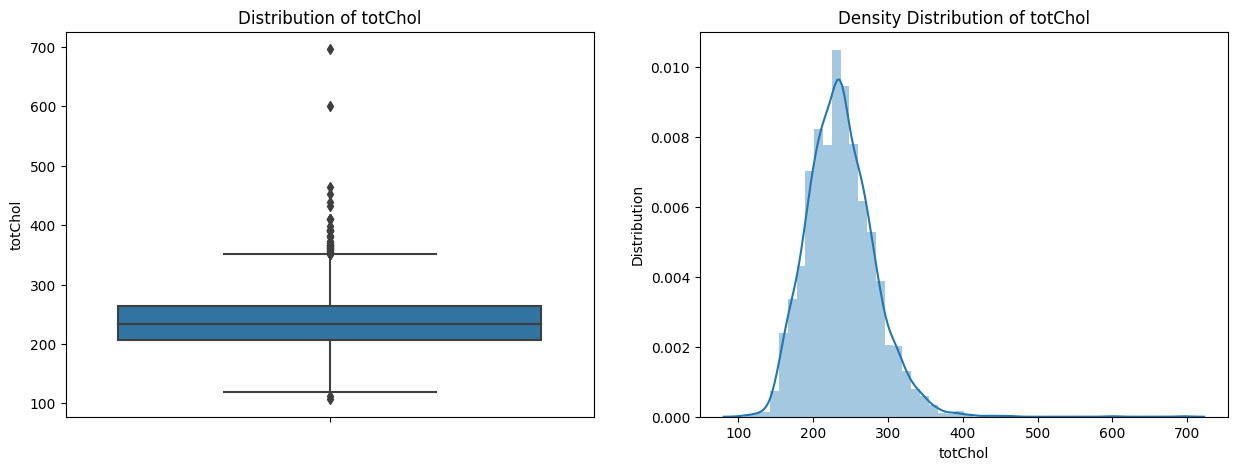

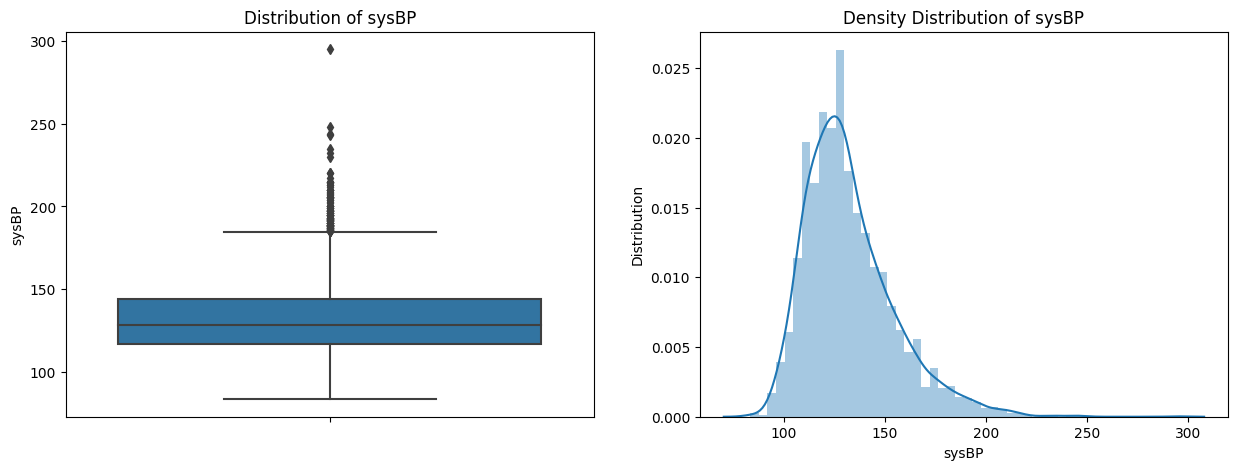

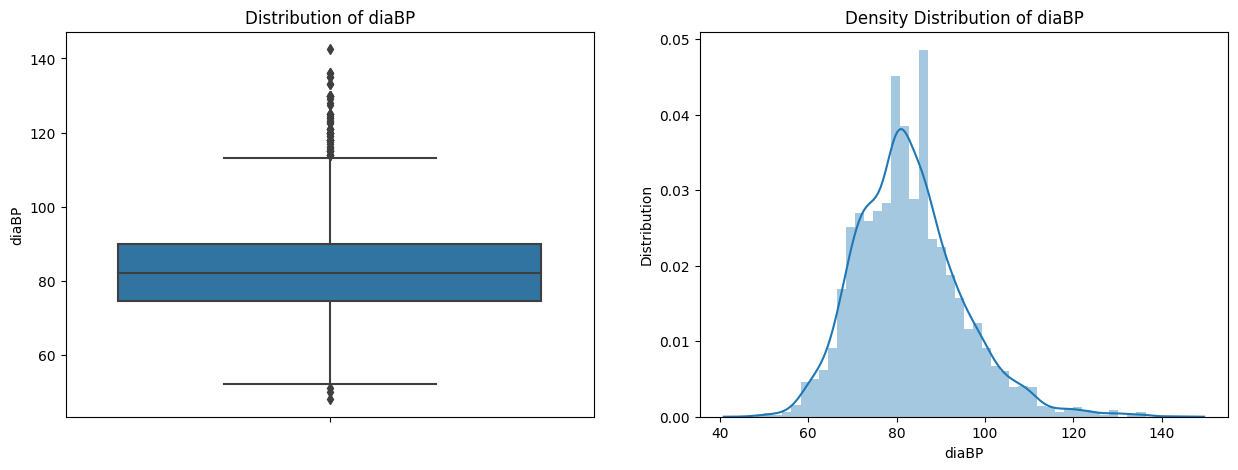

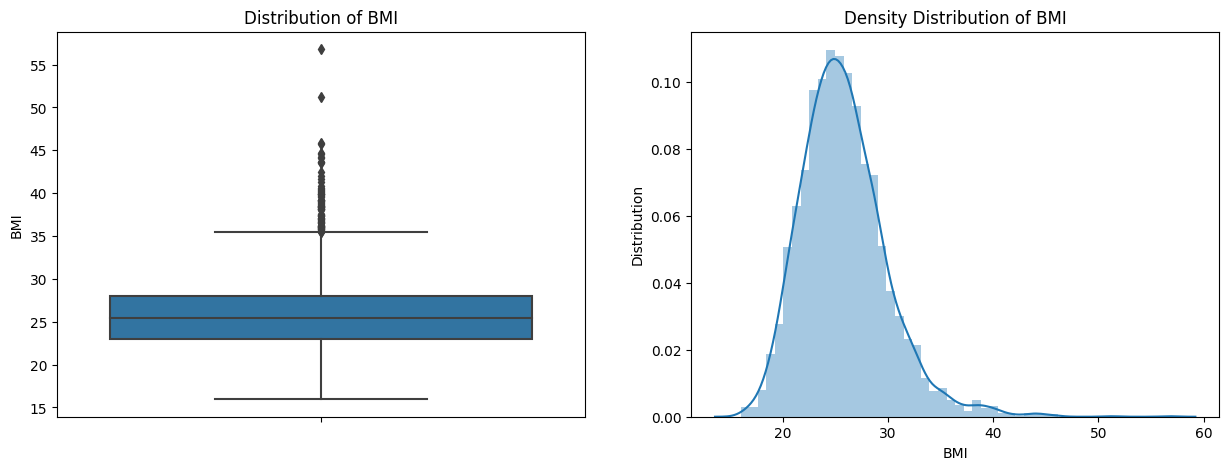

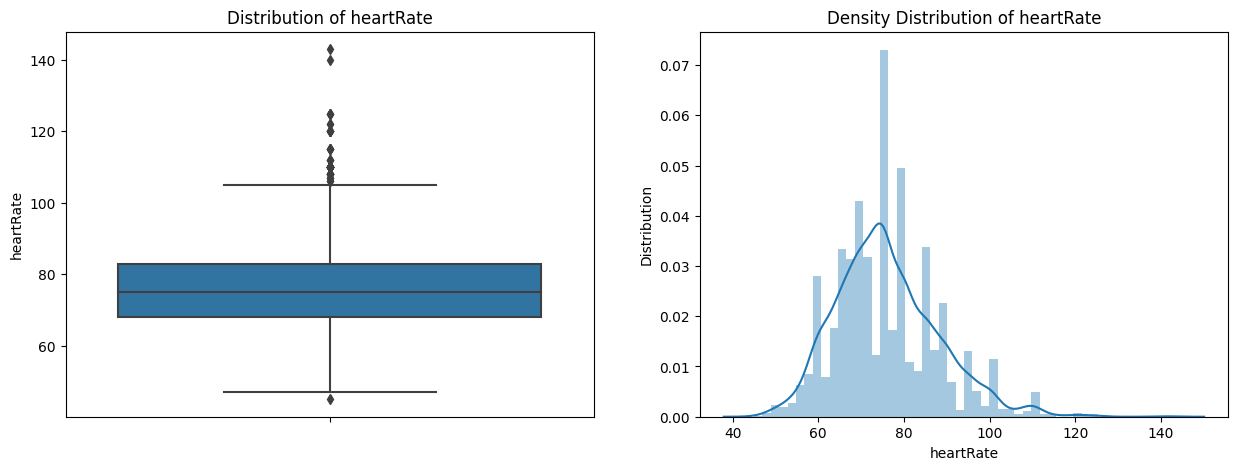

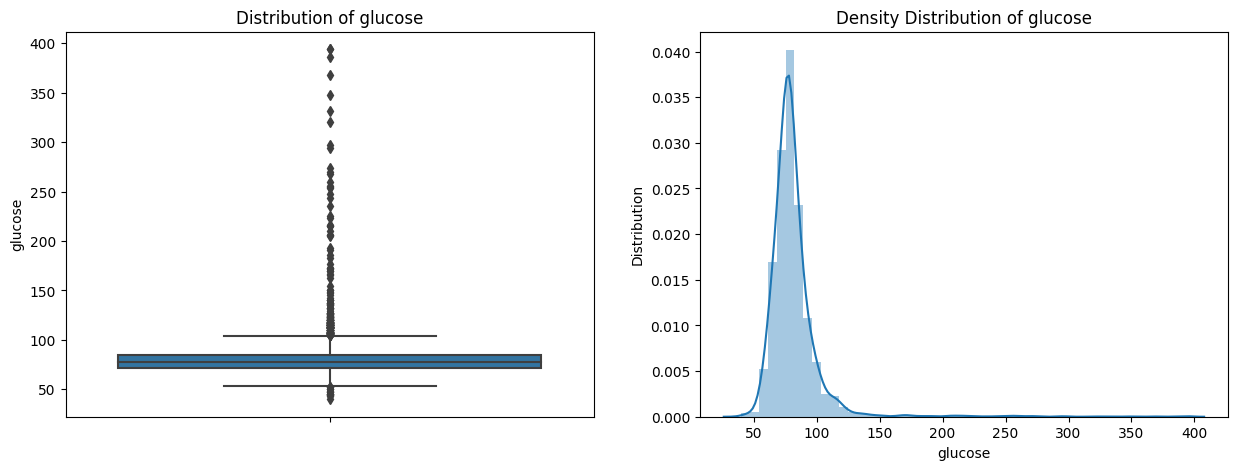

In [17]:

# Plotting the boxplot of the continuous variables

for variables in continuous_var:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    figure = sns.boxplot(y = df[variables])
    figure.set(title = f'Distribution of {variables}')
    figure.set(ylabel= variables)
    
# Plotting the density distribution of the continuous variables

    plt.subplot(1, 2, 2)
    figure = sns.distplot(df[variables])
    figure.set(title = f'Density Distribution of {variables}')
    figure.set(xlabel=variables, ylabel= 'Distribution')


In [21]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, '10 Year CHD')

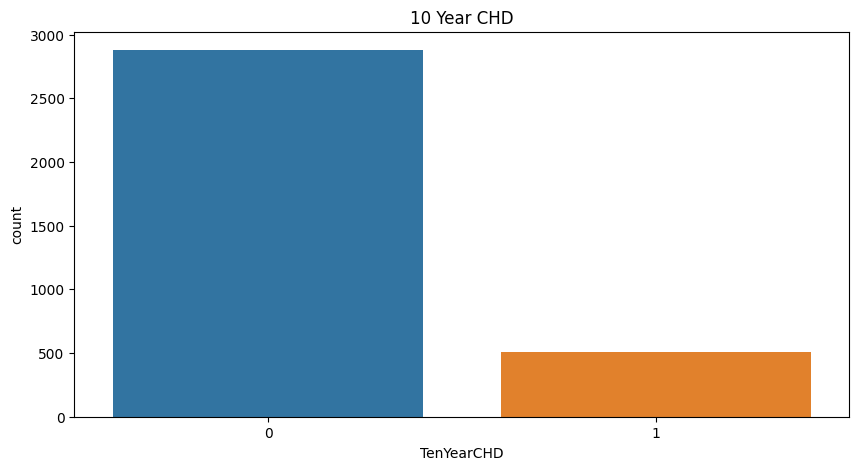

In [32]:
# Plotting a countplot of the target variable (TenYearCHD)
plt.figure(figsize=(10,5))
sns.countplot(x = df['TenYearCHD'])
plt.title('10 Year CHD')

**Bivariate Analysis :-**

Text(0.5, 1.0, 'Relation between Systolic Blood Pressure and Diastolic Blood Pressure')

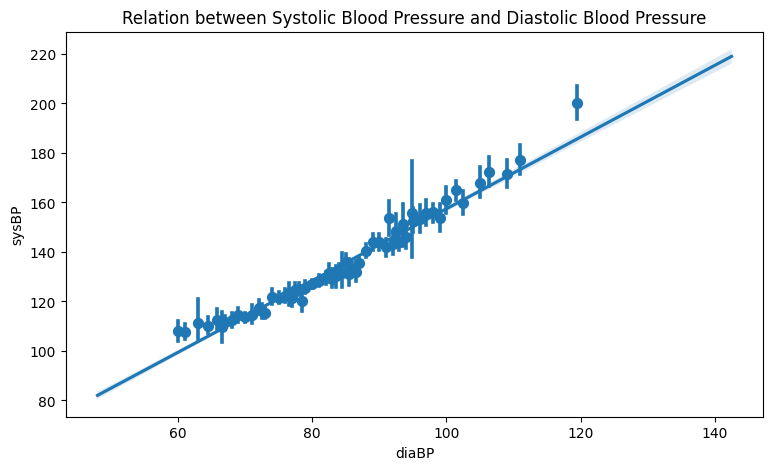

In [36]:
# Plotting a regression plot between sysBP and diaBP

plt.figure(figsize=(9,5))
sns.regplot(x = df['diaBP'], y = df['sysBP'], fit_reg=True, x_bins=100)
plt.title('Relation between Systolic Blood Pressure and Diastolic Blood Pressure')

Systolic Blood Pressure and Diastolic Blood Pressure always show a linear relationship, so anyone out of the 2 can be neglected for the analysis as it would show the same relation with the other variables 

<Axes: xlabel='age', ylabel='cigsPerDay'>

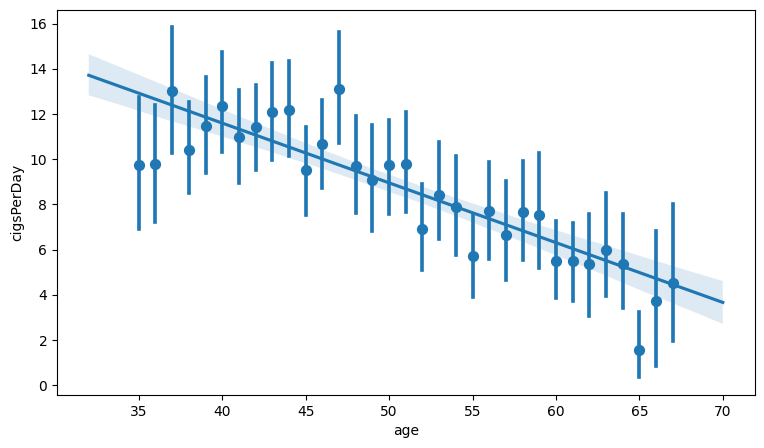

In [38]:
# Plotting a regression plot between age and cigsPerDay
plt.figure(figsize=(9,5))
sns.regplot(x = df['age'], y = df['cigsPerDay'], fit_reg=True, x_bins=100)

The numbers of cigarettes consumed per day decreases as the age increases

<Axes: xlabel='sysBP', ylabel='cigsPerDay'>

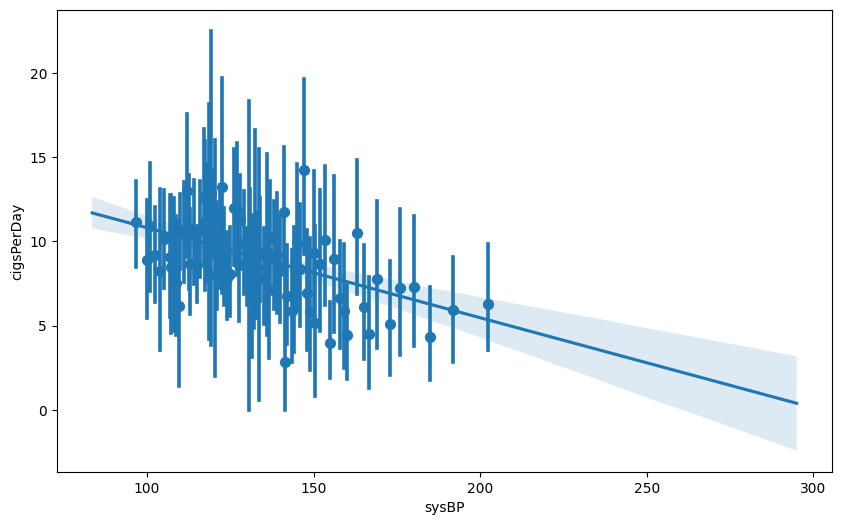

In [40]:
# Plotting a regression plot between sysBP and cigsPerDay
plt.figure(figsize=(10,6))
sns.regplot(x = df['sysBP'], y = df['cigsPerDay'], fit_reg=True, x_bins=100)

Systolic Blood Pressure decreases as the cigarettes consumed per day increases

<Axes: xlabel='BMI', ylabel='cigsPerDay'>

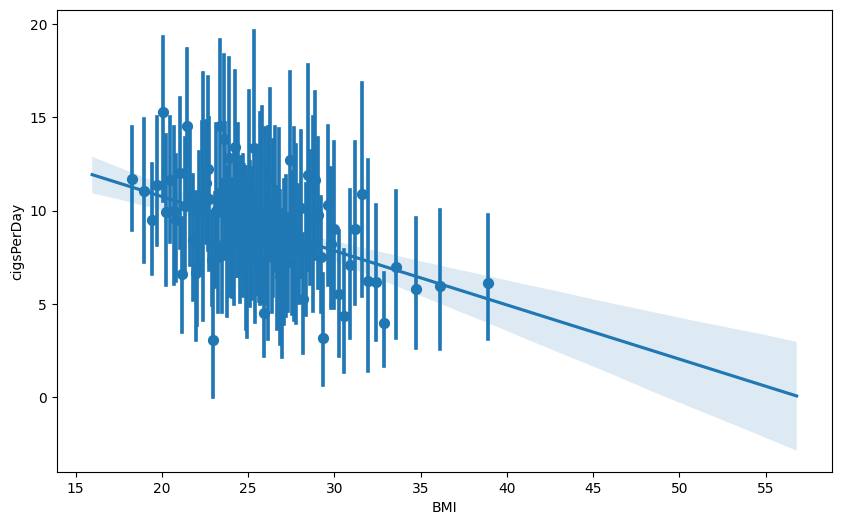

In [42]:
# Plotting a regression plot between BMI and cigsPerDay
plt.figure(figsize=(10,6))
sns.regplot(x= df['BMI'], y =  df['cigsPerDay'], fit_reg=True, x_bins=100)

<Axes: xlabel='heartRate', ylabel='cigsPerDay'>

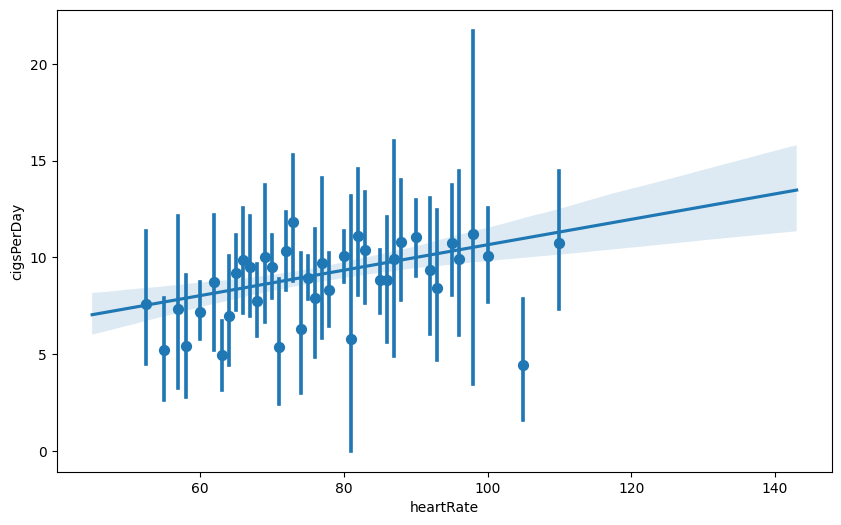

In [43]:
# Plotting a regression plot between heartRate and cigsPerDay
plt.figure(figsize=(10,6))
sns.regplot(x = df['heartRate'], y=  df['cigsPerDay'], fit_reg=True, x_bins=100)

Heart Rate increases as the cigarettes consumed per day increases

<Axes: xlabel='age', ylabel='totChol'>

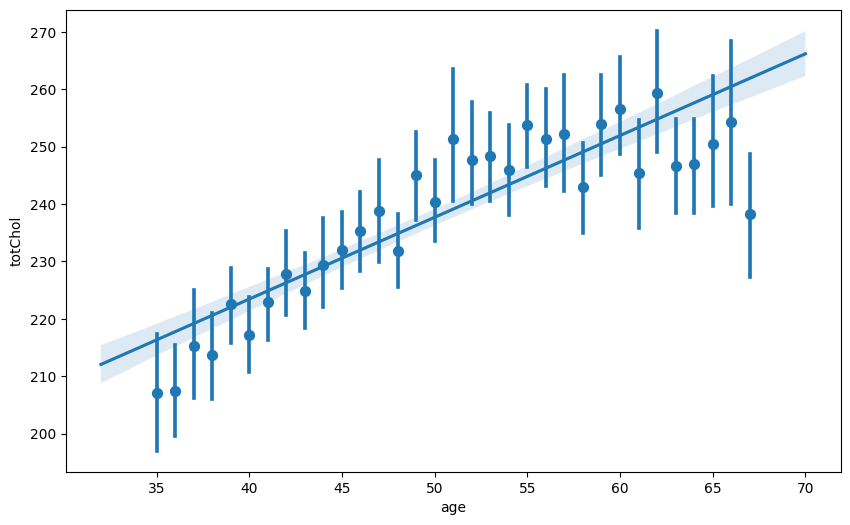

In [44]:
# Plotting a regression plot between age and totChol
plt.figure(figsize=(10,6))
sns.regplot(x = df['age'],y =  df['totChol'], fit_reg=True, x_bins=100)

As the age increases the total cholestrol of the body also increases

<Axes: xlabel='age', ylabel='TenYearCHD'>

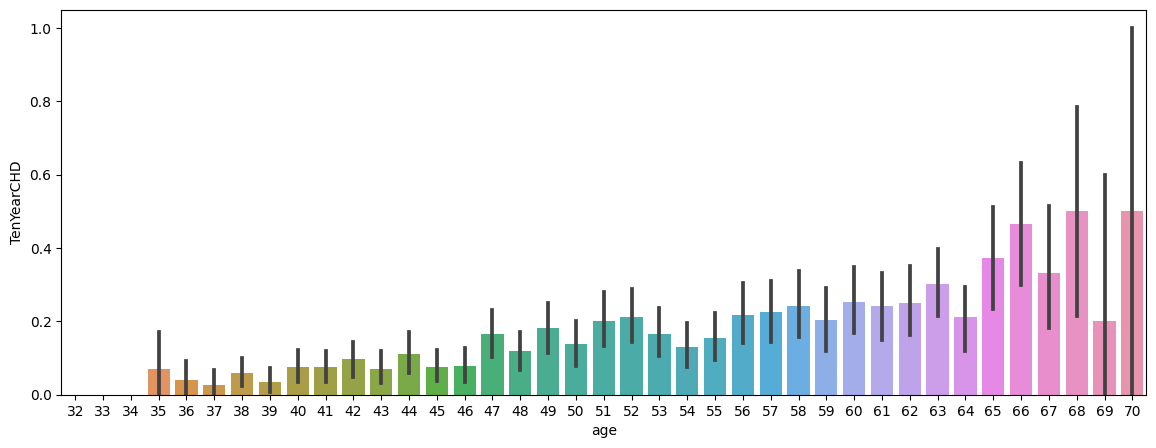

In [45]:
# Plotting a barplot between age and TenYearCHD
plt.figure(figsize=(14,5))
sns.barplot(x = df['age'], y=  df['TenYearCHD'])

As the age increases the risk of getting a coronary heart disease increases not such significantly but by a small ratio

**Multivariate Analysis ->**

Text(0.5, 1.0, 'Distribution of the age of people at the risk of coronary heart disease on the basis of Smoking')

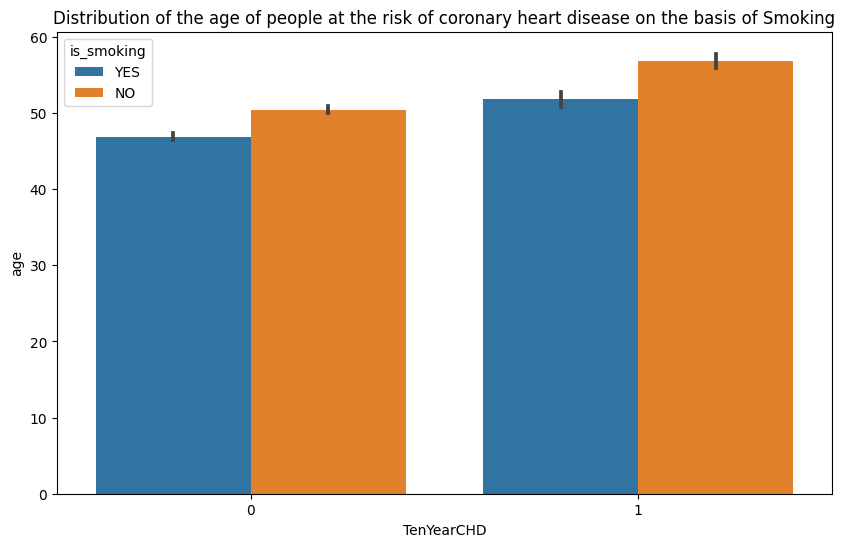

In [53]:
# Plotting a barplot of the age of the people at the risk of coronary heart disease on the basis of smoking
plt.figure(figsize=(10,6))
sns.barplot(x = df['TenYearCHD'], y= df['age'], hue= df['is_smoking'])
plt.title('Distribution of the age of people at the risk of coronary heart disease on the basis of Smoking')

Text(0.5, 1.0, 'Distribution of the age of people at the risk of coronary heart disease on the basis of Gender')

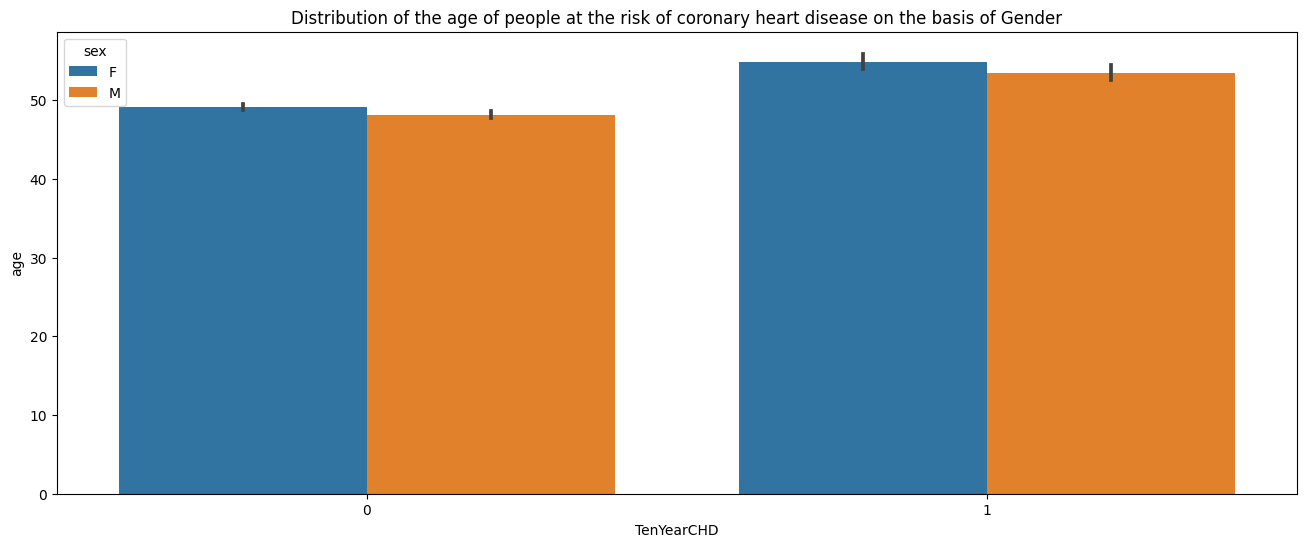

In [56]:
# Plotting a barplot of the age of the people at the risk of coronary heart disease on the basis of gender
plt.figure(figsize=(16,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['age'], hue=df['sex'])
plt.title('Distribution of the age of people at the risk of coronary heart disease on the basis of Gender')

Text(0.5, 1.0, 'Distribution of the Cigarettes Consumption Per Day of people at the risk of coronary heart disease on the basis of Gender')

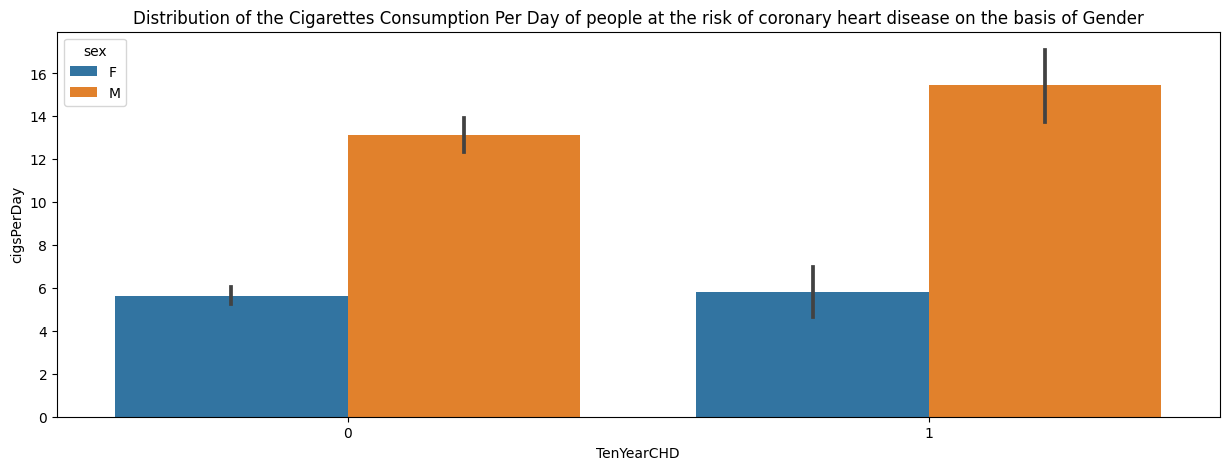

In [59]:
# Plotting a barplot of the 'cigsPerDay' of the people at the risk of coronary heart disease on the basis of gender
plt.figure(figsize=(15,5))
figure = sns.barplot(x=df['TenYearCHD'], y=df['cigsPerDay'], hue=df['sex'])
plt.title('Distribution of the Cigarettes Consumption Per Day of people at the risk of coronary heart disease on the basis of Gender')

Text(0.5, 1.0, 'Distribution of the Heart Rate of people at the risk of coronary heart disease on the basis of Hypertension History')

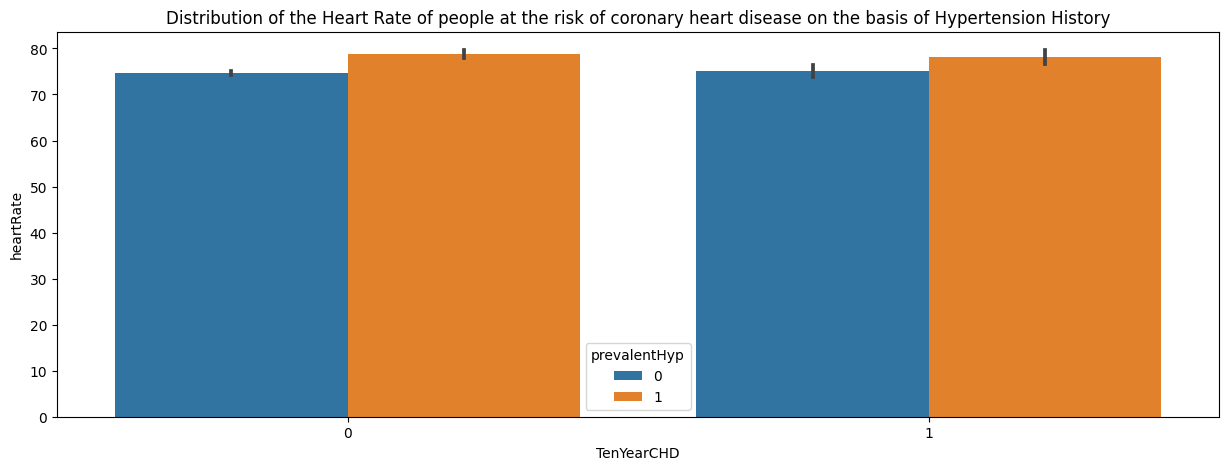

In [61]:
# Plotting a barplot of the 'heartRate' of the people at the risk of coronary heart disease on the basis of prevalent hypertension
plt.figure(figsize=(15,5))
figure = sns.barplot(x=df['TenYearCHD'], y=df['heartRate'], hue=df['prevalentHyp'])
plt.title('Distribution of the Heart Rate of people at the risk of coronary heart disease on the basis of Hypertension History')

<Axes: >

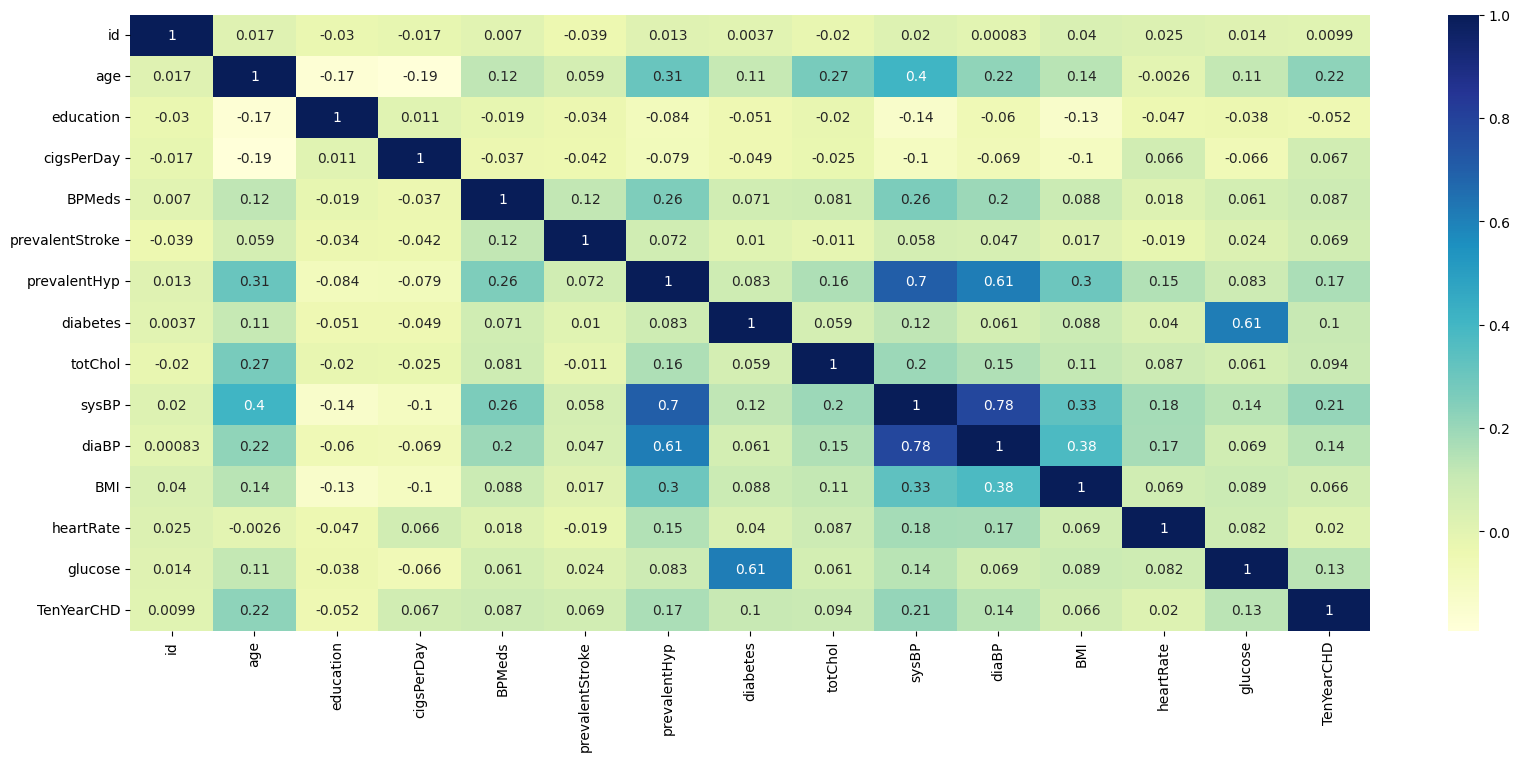

In [106]:
# Plotting a correlation matrix between all the variables to see the relation between each one of them
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot= True, cmap = 'YlGnBu')

In [107]:
df.drop('id', axis =1 ,inplace = True)

In [108]:
#Dropping the columns with high correlation
df.drop(columns=['prevalentHyp','diabetes'], axis = 1 , inplace = True)

In [110]:
#Dropping the columns with high correlation
df.drop(columns=['diaBP'], axis = 1 , inplace = True)

<Axes: >

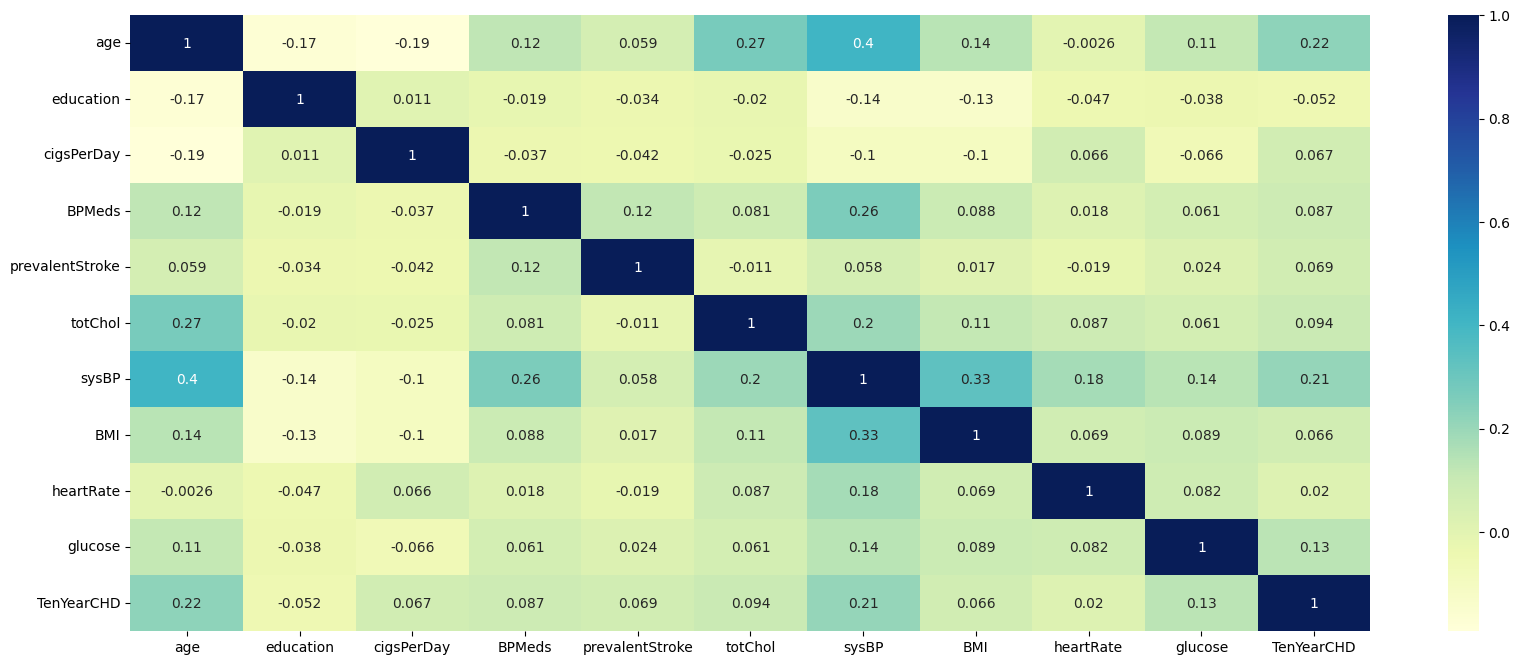

In [111]:
# Plotting a correlation matrix between all the variables to see the relation between each one of them
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot= True, cmap = 'YlGnBu')

**Handling the Categorical columns for modeling**

In [112]:
# Converting the string datatypes column to numerical for modelling
df = pd.get_dummies(df, columns=['sex', 'is_smoking'], drop_first=True)

In [113]:
df.head(3)

,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,sex_M,is_smoking_YES
0,64,2,3.0,0,0,221.0,148.0,25.38,90.0,80.0,1,0,1
1,36,4,0.0,0,0,212.0,168.0,29.77,72.0,75.0,0,1,0
2,46,1,10.0,0,0,250.0,116.0,20.35,88.0,94.0,0,0,1


In [115]:
#Selecting the dependent & Independent columns for modeling..!
X = df.drop(columns= ['TenYearCHD'])
y = df['TenYearCHD']

In [116]:
X.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'sex_M',
       'is_smoking_YES'],
      dtype='object')

In [117]:
# Checking the count of target variable
print(y.value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
# Using SMOTE for oversampling technique as the target variable is imbalanced

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [120]:
# Checking the count of target variable after oversampling

print((y_smote).value_counts())

1    2879
0    2879
Name: TenYearCHD, dtype: int64


In [121]:
#Importing all the neccessary modules for modeling..!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [122]:
#Importing the machine learning models..!
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

In [123]:
#Importing the metrics for evaluation..!
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_auc_score, classification_report

In [124]:
# Splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 42)

In [125]:
# Scaling the train and test dataset for better accuracy
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [126]:
#Storing all the algorithms in a list..
models=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('XGB Classifier', XGBClassifier()))
models.append(('Support Vector Classifier', SVC()))
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))

In [127]:
# Running all the algorithms in the loop with cross-validation to check the best ROC-AUC score

scores = {}
for name, model in models:   
    score = np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc'))
    scores[name] = score

In [128]:
scores

{'Logistic Regression': 0.7515201288869638,
 'Decision Tree Classifier': 0.7853828911625819,
 'Random Forest Classifier': 0.9443839760956273,
 'Gradient Boosting Classifier': 0.8867725461699448,
 'XGB Classifier': 0.943839646233382,
 'Support Vector Classifier': 0.805332900146069,
 'GaussianNB': 0.7213909836702693,
 'BernoulliNB': 0.6928866564119625}

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree Classifier'),
  Text(2, 0, 'Random Forest Classifier'),
  Text(3, 0, 'Gradient Boosting Classifier'),
  Text(4, 0, 'XGB Classifier'),
  Text(5, 0, 'Support Vector Classifier'),
  Text(6, 0, 'GaussianNB'),
  Text(7, 0, 'BernoulliNB')])

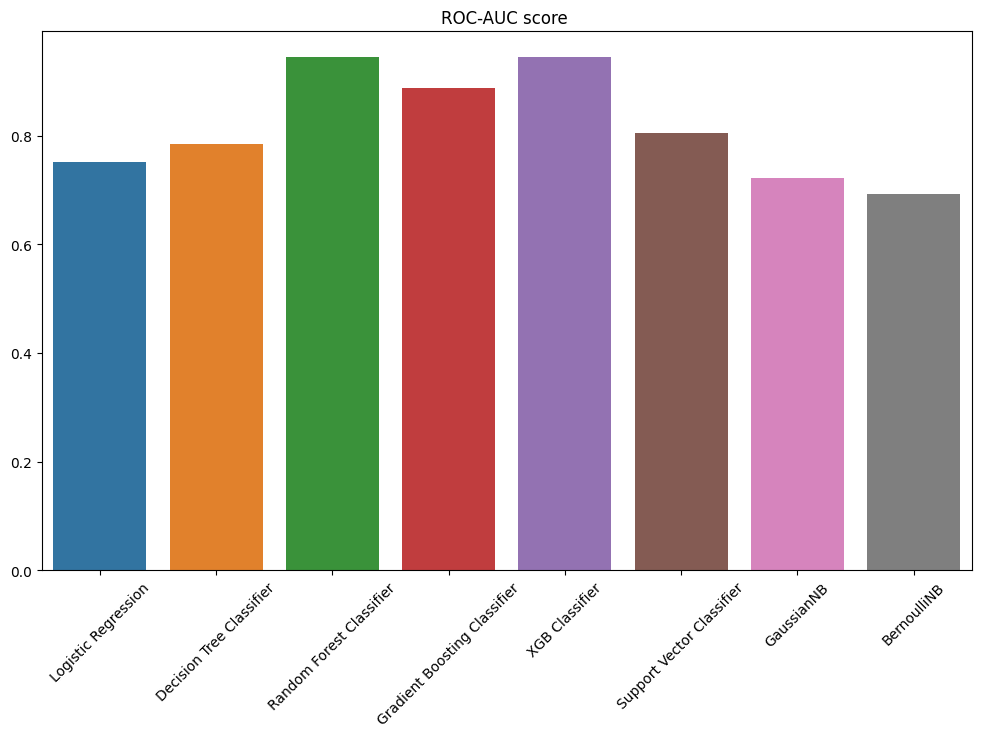

In [131]:
# Plotting a barplot of the ROC-AUC scores of all the algorithms
plt.figure(figsize=(12,7))
sns.barplot(x = list(scores.keys()),y= list(scores.values()))
plt.title('ROC-AUC score ')
plt.xticks(rotation = 45)

### **Hyper-Parameter Tuning using Random Forest Classifier**

In [132]:
# Initializing the Random Forest Classifier Model

rfc = RandomForestClassifier()

In [133]:
# Getting the parameters of the Random Forest Classifier
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [134]:
# Giving a range to the hyperparameters for selecting best parameters from them

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = range(2, 10)
min_samples_leaf = range(2, 10)
bootstrap = [True, False]

# Storing the hyperparameters in a dictionary
  
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [135]:
# Using Random Search CV for selecting the best parameters

rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions = random_grid, cv = 10, verbose=2, scoring='roc_auc')

# Fitting the model with the training and testing dataset

rfc_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time=  14.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time=  11.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time=  14.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time=  17.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time=  16.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=1800; total time= 

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='roc_auc', verbose=2)

In [136]:
# Getting the best parameters after the Random Search Cross Validation

rfc_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 30,
 'bootstrap': False}

In [137]:
# Initializing a Random Forest Classifier with the best parameters obtained

rf_model = RandomForestClassifier(bootstrap = False, max_depth = 20, min_samples_leaf = 4,
                                        min_samples_split = 5, n_estimators = 200)

rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200)

In [138]:
# Getting the training predictions

rf_train_preds = rf_model.predict(X_train)

#Getting the testing predictions

rf_test_preds = rf_model.predict(X_test)

In [139]:
# Printing the training classification report of the model

print(classification_report(rf_train_preds, y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2156
           1       0.99      1.00      1.00      2162

    accuracy                           1.00      4318
   macro avg       1.00      1.00      1.00      4318
weighted avg       1.00      1.00      1.00      4318



In [140]:
# Printing the testing classification report of the model

print(classification_report(rf_test_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       732
           1       0.86      0.86      0.86       708

    accuracy                           0.86      1440
   macro avg       0.86      0.86      0.86      1440
weighted avg       0.86      0.86      0.86      1440



In [141]:
results_df = pd.DataFrame(columns=['model_name', 'train_accuracy', 'test_accuracy',
                                   'train_recall','test_recall','train_precision',
                                   'test_precision','train_ROC', 'test_ROC', 'train_f1',
                                   'test_f1'])

In [142]:
# Updating the results dataframe with the Random Forest Classifier metrics

results_df.loc[0,'model_name'] = 'Random Forest Classifier'
results_df.loc[0,'train_accuracy'] = round(accuracy_score(y_train, rf_train_preds),2)
results_df.loc[0,'test_accuracy'] = round(accuracy_score(y_test, rf_test_preds),2)
results_df.loc[0,'train_recall'] = round(recall_score(y_train, rf_train_preds),2)
results_df.loc[0,'test_recall'] = round(recall_score(y_test, rf_test_preds),2)
results_df.loc[0,'train_precision'] = round(precision_score(y_train, rf_train_preds),2)
results_df.loc[0,'test_precision'] = round(precision_score(y_test, rf_test_preds),2)
results_df.loc[0,'train_ROC'] = round(roc_auc_score(y_train, rf_train_preds),2)
results_df.loc[0,'test_ROC'] = round(roc_auc_score(y_test, rf_test_preds),2)
results_df.loc[0,'train_f1'] = round(f1_score(y_train, rf_train_preds),2)
results_df.loc[0,'test_f1'] = round(f1_score(y_test, rf_test_preds),2)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

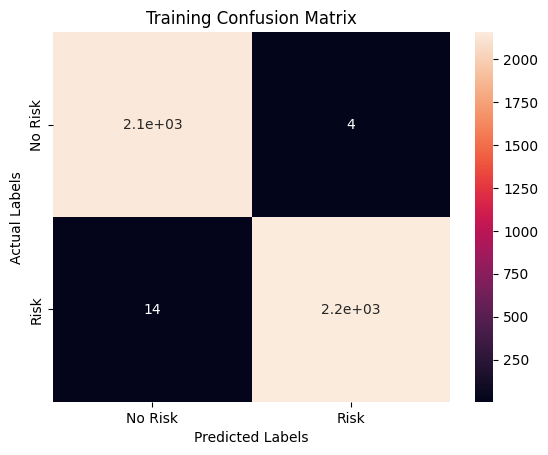

In [143]:
# Plotting confusion matrix for the training dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_train, rf_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

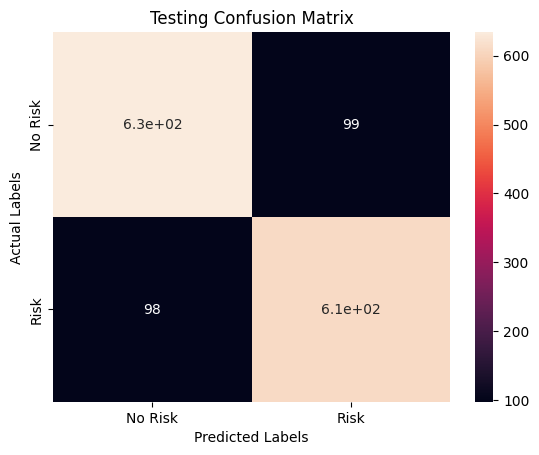

In [144]:
# Plotting confusion matrix for the testing dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_test, rf_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [145]:
# Installing shap

!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.4 MB/s eta 0:00:00


In [146]:
# Importing shap for model interpretability

import shap

In [147]:
# Creating a dataframe for column names to be used in shap visualization
feature_columns = pd.DataFrame(X_test, columns=['id','age', 'education', 'cigsPerDay', 
                                                'prevalentHyp', 'totChol', 'sysBP', 'BMI',
                                                'heartRate', 'glucose', 'sex_M', 'is_smoking_YES'])

In [148]:
# Getting the Random Forest Classifier Model Interpretability using shap

explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

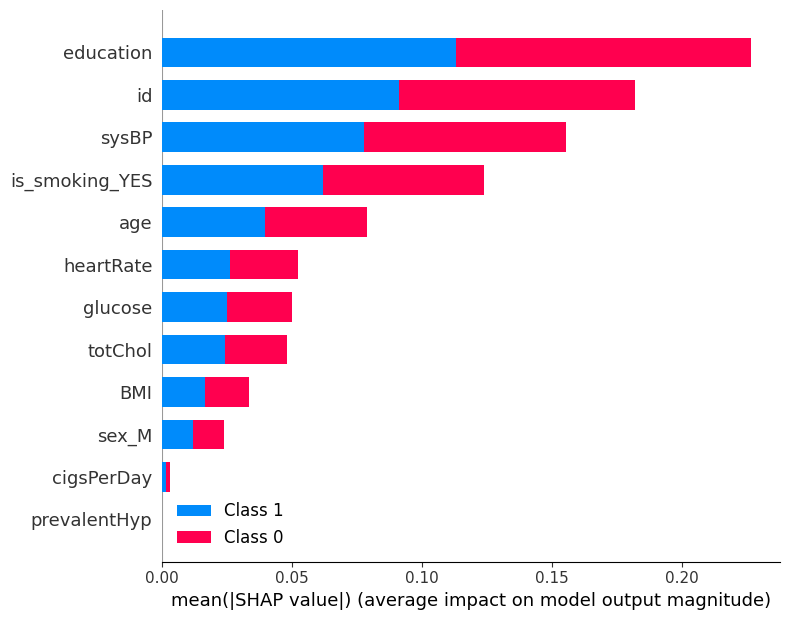

In [149]:
shap.summary_plot(shap_values_rf, feature_columns, plot_type="bar")

### **Hyper-Parameter Tuning using Gradient Boosting Classifier**

In [150]:
# Initializing the Gradient Boosting Classifier Model

gbc = GradientBoostingClassifier()

In [151]:
# Getting the parameters of the Gradient Boosting Classifier

gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [152]:
# Giving a range to the hyperparameters for selecting best parameters from them

learning_rate = [0.1, 0.01, 1, 10]
max_depth = range(3, 20)
max_features = ['auto']
max_leaf_nodes = range(3, 20)
min_samples_leaf = range(1, 10)
min_samples_split = range(1, 10)
n_estimators = range(100, 2000, 200)

# Storing the hyperparameters in a dictionary
  
gradient_grid = {'learning_rate': learning_rate,
                'max_depth': max_depth,
               'max_features': max_features,
               'max_leaf_nodes': max_leaf_nodes,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split,
               'n_estimators': n_estimators}

In [153]:
# Using Random Search CV for selecting the best parameters

gbc_random = RandomizedSearchCV(estimator=gbc, param_distributions = gradient_grid, cv = 10, verbose=2, scoring='roc_auc')

# Fitting the model with the training and testing dataset

gbc_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END learning_rate=1, max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   8.6s
[CV] END learning_rate=1, max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=  10.3s
[CV] END learning_rate=1, max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   6.7s
[CV] END learning_rate=1, max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   9.0s
[CV] END learning_rate=1, max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   7.3s
[CV] END learning_rate=1, max_depth=6, max_features=auto, max_leaf_nodes=4, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   7.7s
[CV] END lear

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_depth': range(3, 20),
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': range(3, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': range(100, 2000, 200)},
                   scoring='roc_auc', verbose=2)

In [154]:
# Getting the best parameters after the Random Search Cross Validation

gbc_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 18,
 'max_features': 'auto',
 'max_depth': 9,
 'learning_rate': 0.1}

In [155]:
# Initializing a Gradient Boosting Classifier with the best parameters obtained

gbc_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 9, max_features = 'auto',
                                       max_leaf_nodes = 18, min_samples_leaf = 4, min_samples_split = 2,
                                       n_estimators = 900)

gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=9, max_features='auto', max_leaf_nodes=18,
                           min_samples_leaf=4, n_estimators=900)

In [156]:
# Getting the training predictions

gbc_train_preds = gbc_model.predict(X_train)

#Getting the testing predictions

gbc_test_preds = gbc_model.predict(X_test)

In [157]:
# Printing the training classification report of the model

print(classification_report(gbc_train_preds, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2146
           1       1.00      1.00      1.00      2172

    accuracy                           1.00      4318
   macro avg       1.00      1.00      1.00      4318
weighted avg       1.00      1.00      1.00      4318



In [158]:
# Printing the testing classification report of the model

print(classification_report(gbc_test_preds, y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       772
           1       0.86      0.91      0.89       668

    accuracy                           0.89      1440
   macro avg       0.89      0.89      0.89      1440
weighted avg       0.89      0.89      0.89      1440



In [159]:
# Updating the results dataframe with the Gradient Boosting Classifier metrics

results_df.loc[1,'model_name'] = 'Gradient Boosting Classifier'
results_df.loc[1,'train_accuracy'] = round(accuracy_score(y_train, gbc_train_preds),2)
results_df.loc[1,'test_accuracy'] = round(accuracy_score(y_test, gbc_test_preds),2)
results_df.loc[1,'train_recall'] = round(recall_score(y_train, gbc_train_preds),2)
results_df.loc[1,'test_recall'] = round(recall_score(y_test, gbc_test_preds),2)
results_df.loc[1,'train_precision'] = round(precision_score(y_train, gbc_train_preds),2)
results_df.loc[1,'test_precision'] = round(precision_score(y_test, gbc_test_preds),2)
results_df.loc[1,'train_ROC'] = round(roc_auc_score(y_train, gbc_train_preds),2)
results_df.loc[1,'test_ROC'] = round(roc_auc_score(y_test, gbc_test_preds),2)
results_df.loc[1,'train_f1'] = round(f1_score(y_train, gbc_train_preds),2)
results_df.loc[1,'test_f1'] = round(f1_score(y_test, gbc_test_preds),2)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

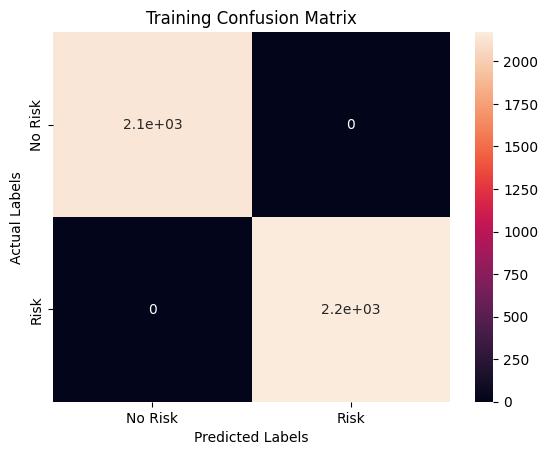

In [160]:
# Plotting confusion matrix for the training dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_train, gbc_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

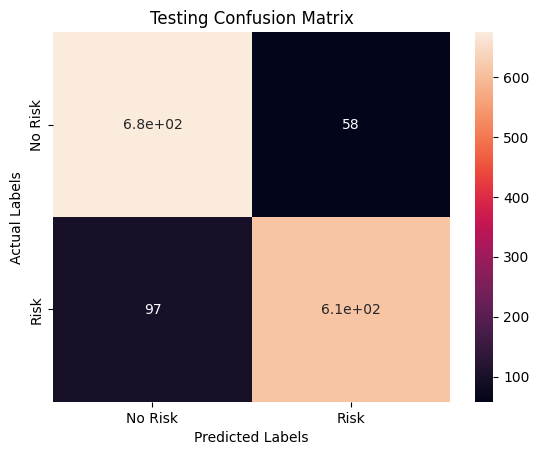

In [161]:
# Plotting confusion matrix for the testing dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_test, gbc_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [162]:
# Getting the Gradient Boosting Classifier Model Interpretability using shap

explainer_gbc = shap.TreeExplainer(gbc_model)
shap_values_gbc = explainer_gbc.shap_values(X_test)

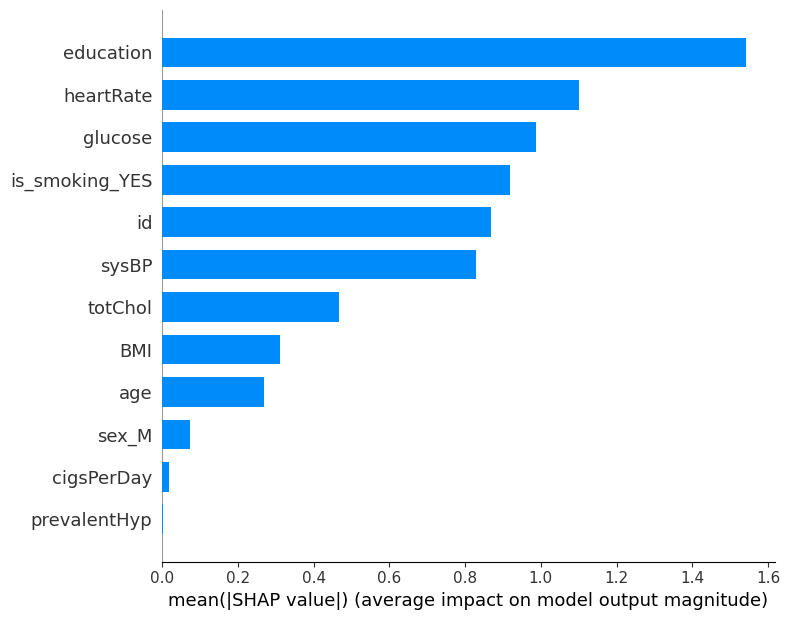

In [163]:
shap.summary_plot(shap_values_gbc, feature_columns, plot_type="bar")

### **Hyper-Parameter Tuning using XG Boost Classifier**

In [164]:
# Initializing the XG Boost Classifier Model

xgb = XGBClassifier()

In [165]:
# Getting the parameters of the XG Boost Classifier

xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [166]:
# Giving a range to the hyperparameters for selecting best parameters from them

gamma = range(0,5)
learning_rate = [0.1, 0.01, 1, 10]
max_delta_step = range(0, 10)
max_depth = range(3, 20)
min_child_weight = range(0,10)
n_estimators = range(100, 2000, 200)
n_jobs = range(1,5)
reg_alpha = range(0, 200, 20)
reg_lambda = range(1,5)

# Storing the hyperparameters in a dictionary
  
xgboost_grid = {'gamma': gamma,
                'learning_rate': learning_rate,
                'max_delta_step': max_delta_step,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,
                'n_estimators': n_estimators,
                'n_jobs': n_jobs,
                'reg_alpha': reg_alpha,
                'reg_lambda': reg_lambda}

In [167]:
# Using Random Search CV for selecting the best parameters

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions = xgboost_grid, cv = 10, verbose=2, scoring='roc_auc')

# Fitting the model with the training and testing dataset

xgb_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END gamma=2, learning_rate=0.01, max_delta_step=9, max_depth=11, min_child_weight=6, n_estimators=1300, n_jobs=1, reg_alpha=120, reg_lambda=3; total time=   3.4s
[CV] END gamma=2, learning_rate=0.01, max_delta_step=9, max_depth=11, min_child_weight=6, n_estimators=1300, n_jobs=1, reg_alpha=120, reg_lambda=3; total time=   3.2s
[CV] END gamma=2, learning_rate=0.01, max_delta_step=9, max_depth=11, min_child_weight=6, n_estimators=1300, n_jobs=1, reg_alpha=120, reg_lambda=3; total time=   4.3s
[CV] END gamma=2, learning_rate=0.01, max_delta_step=9, max_depth=11, min_child_weight=6, n_estimators=1300, n_jobs=1, reg_alpha=120, reg_lambda=3; total time=   3.4s
[CV] END gamma=2, learning_rate=0.01, max_delta_step=9, max_depth=11, min_child_weight=6, n_estimators=1300, n_jobs=1, reg_alpha=120, reg_lambda=3; total time=   3.2s
[CV] END gamma=2, learning_rate=0.01, max_delta_step=9, max_depth=11, min_child_weight=6, n_estimators

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(0, 5),
                                        'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_delta_step': range(0, 10),
                                        'max_depth': range(3, 20),
                                        'min_child_weight': range(0, 10),
                                        'n_estimators': range(100, 2000, 200),
                                        'n_jobs': range(1, 5),
                                        'reg_alpha': range(0, 200, 20),
                                        'reg_lambda': range(1, 5)},
                   scoring='roc_auc', verbose=2)

In [168]:
# Getting the best parameters after the Random Search Cross Validation

xgb_random.best_params_

{'reg_lambda': 3,
 'reg_alpha': 40,
 'n_jobs': 1,
 'n_estimators': 700,
 'min_child_weight': 2,
 'max_depth': 3,
 'max_delta_step': 3,
 'learning_rate': 1,
 'gamma': 1}

In [169]:
# Initializing a XG Boost Classifier with the best parameters obtained

xgb_model = XGBClassifier(gamma = 1, learning_rate=1, max_delta_step = 3, max_depth = 3,
                          min_child_weight = 2, n_estimators = 700, n_jobs = 1,
                          reg_alpha = 40, reg_lambda = 3)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=3, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=700, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [170]:
# Getting the training predictions

xgb_train_preds = xgb_model.predict(X_train)

#Getting the testing predictions

xgb_test_preds = xgb_model.predict(X_test)

In [171]:
# Printing the training classification report of the model

print(classification_report(xgb_train_preds, y_train))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2102
           1       0.76      0.74      0.75      2216

    accuracy                           0.74      4318
   macro avg       0.74      0.74      0.74      4318
weighted avg       0.74      0.74      0.74      4318



In [172]:
# Printing the testing classification report of the model

print(classification_report(xgb_test_preds, y_test))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       717
           1       0.73      0.72      0.73       723

    accuracy                           0.73      1440
   macro avg       0.73      0.73      0.73      1440
weighted avg       0.73      0.73      0.73      1440



In [173]:
# Updating the results dataframe with the XG Boost Classifier metrics

results_df.loc[2,'model_name'] = 'XG Boost Classifier'
results_df.loc[2,'train_accuracy'] = round(accuracy_score(y_train, xgb_train_preds),2)
results_df.loc[2,'test_accuracy'] = round(accuracy_score(y_test, xgb_test_preds),2)
results_df.loc[2,'train_recall'] = round(recall_score(y_train, xgb_train_preds),2)
results_df.loc[2,'test_recall'] = round(recall_score(y_test, xgb_test_preds),2)
results_df.loc[2,'train_precision'] = round(precision_score(y_train, xgb_train_preds),2)
results_df.loc[2,'test_precision'] = round(precision_score(y_test, xgb_test_preds),2)
results_df.loc[2,'train_ROC'] = round(roc_auc_score(y_train, xgb_train_preds),2)
results_df.loc[2,'test_ROC'] = round(roc_auc_score(y_test, xgb_test_preds),2)
results_df.loc[2,'train_f1'] = round(f1_score(y_train, xgb_train_preds),2)
results_df.loc[2,'test_f1'] = round(f1_score(y_test, xgb_test_preds),2)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

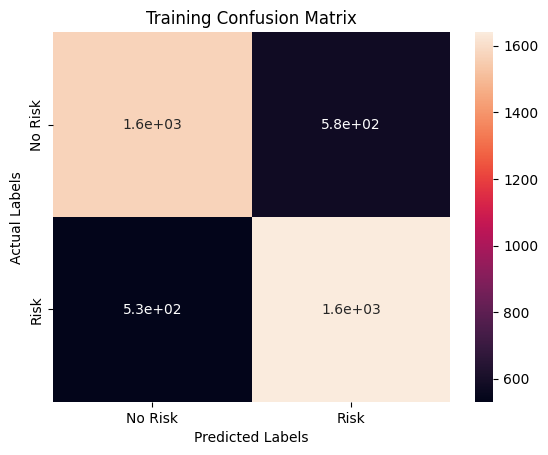

In [174]:
# Plotting confusion matrix for the training dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_train, xgb_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'Risk')]

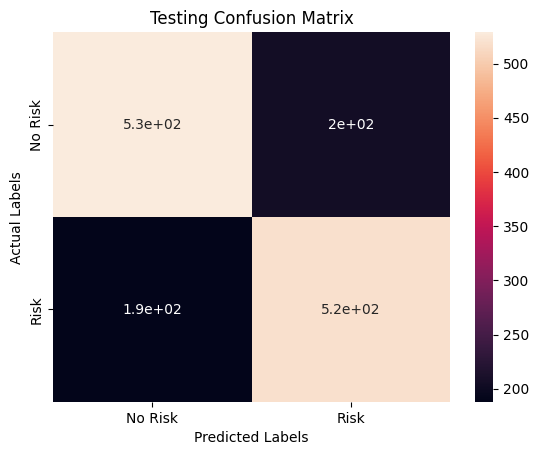

In [175]:
# Plotting confusion matrix for the testing dataset

labels = ['No Risk', 'Risk']
cm = confusion_matrix(y_test, xgb_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [178]:
# Getting the XG Boost Classifier Model Interpretability using shap

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

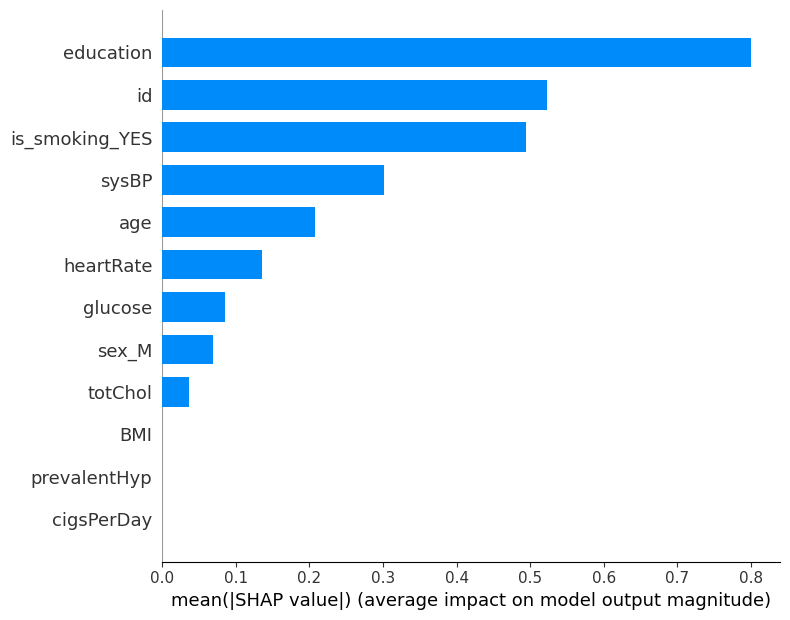

In [179]:
shap.summary_plot(shap_values_xgb, feature_columns, plot_type="bar")

In [180]:
  # Printing the results dataframe

results_df

,model_name,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_ROC,test_ROC,train_f1,test_f1
0,Random Forest Classifier,1.0,0.86,0.99,0.86,1.0,0.86,1.0,0.86,1.0,0.86
1,Gradient Boosting Classifier,1.0,0.89,1.0,0.86,1.0,0.91,1.0,0.89,1.0,0.89
2,XG Boost Classifier,0.74,0.73,0.76,0.73,0.74,0.72,0.74,0.73,0.75,0.73
